<a href="https://colab.research.google.com/github/Ruchika810/Financial-Data-Analysis/blob/main/Financial_Data_Analysis_and_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installation of Dataset and libraries

In [ ]:
!pip install yfinance

In [ ]:
!pip install statsmodels

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Load & Explore the Data

In [ ]:
import yfinance as yf
data = yf.download("AAPL", period="5y", interval="1d")

/tmp/ipython-input-10-4093276101.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", period="5y", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Reset the index to make 'Date' a column
data.reset_index(inplace=True)
data.head()


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-07-10,93.240860,93.299189,92.059800,92.672200,90257200
1,2020-07-13,92.810722,97.163162,92.596866,94.548294,191649200
2,2020-07-14,94.346588,94.538566,91.255408,92.191019,170989200
3,2020-07-15,94.995461,96.475435,93.794954,96.225127,153198000
4,2020-07-16,93.826546,94.684396,93.226293,93.865429,110577600


In [ ]:
# Check structure
data.info()

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2020-07-10 to 2025-07-09
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1255 non-null   float64
 1   (High, AAPL)    1255 non-null   float64
 2   (Low, AAPL)     1255 non-null   float64
 3   (Open, AAPL)    1255 non-null   float64
 4   (Volume, AAPL)  1255 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB
Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


#Data Visualisations

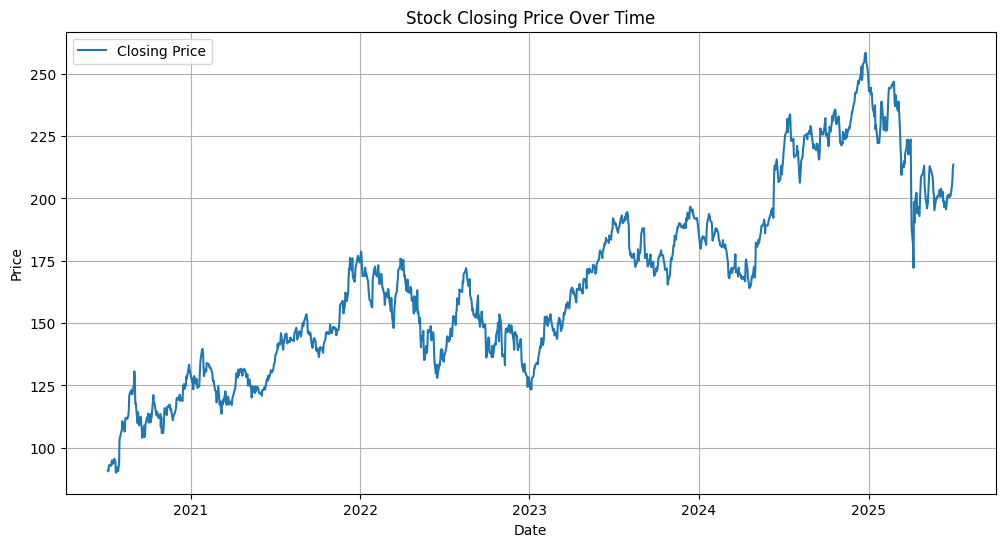

In [ ]:
#Closing Price Over Time
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Closing Price')
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

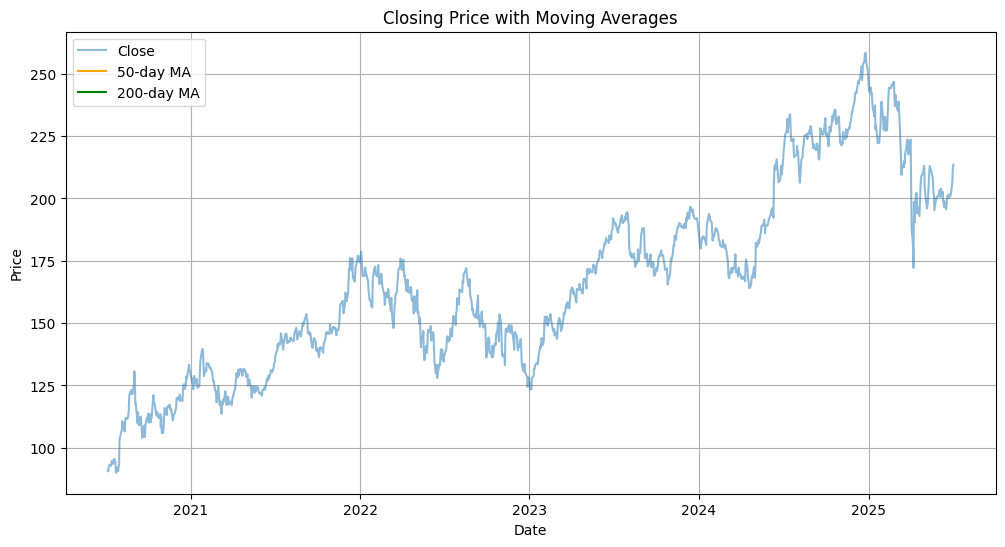

In [ ]:
#Moving Averages (50-day & 200-day)

data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close', alpha=0.5)
plt.plot(data['MA50'], label='50-day MA', color='orange')
plt.plot(data['MA200'], label='200-day MA', color='green')
plt.title("Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

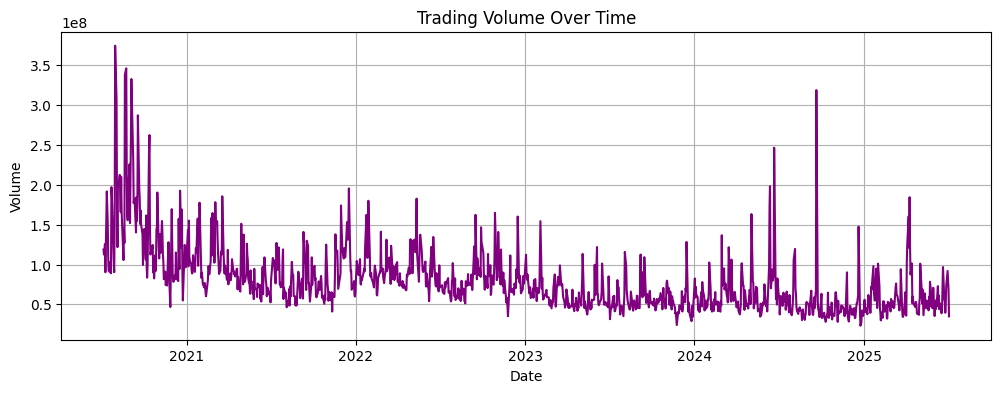

In [ ]:
#Volume Traded Over Time
plt.figure(figsize=(12,4))
plt.plot(data['Volume'], label='Volume', color='purple')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.show()

/tmp/ipython-input-24-2062336955.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Close'].resample('M').mean()


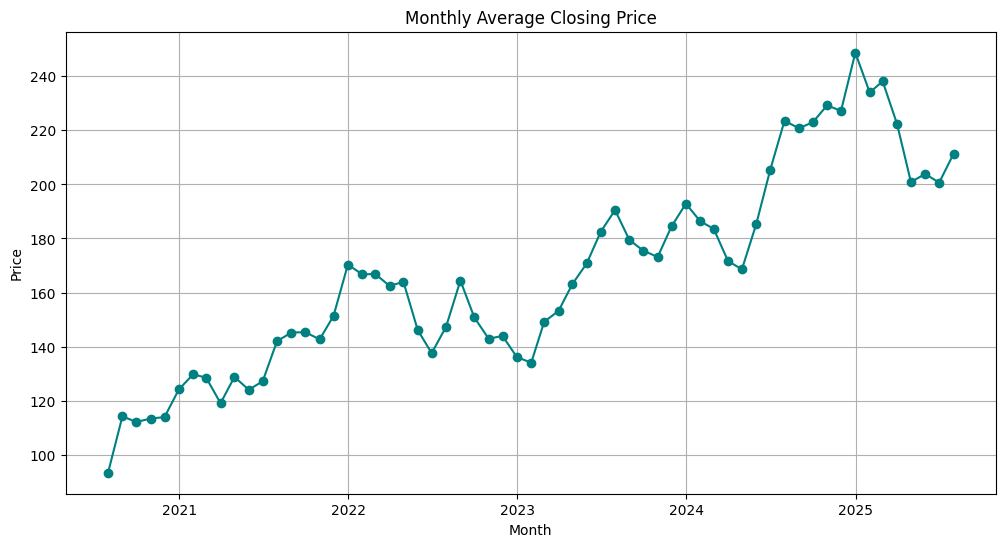

In [ ]:
#Monthly Average Closing Price
monthly_data = data['Close'].resample('M').mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_data, marker='o', linestyle='-', color='teal')
plt.title("Monthly Average Closing Price")
plt.xlabel("Month")
plt.ylabel("Price")
plt.grid(True)
plt.show()

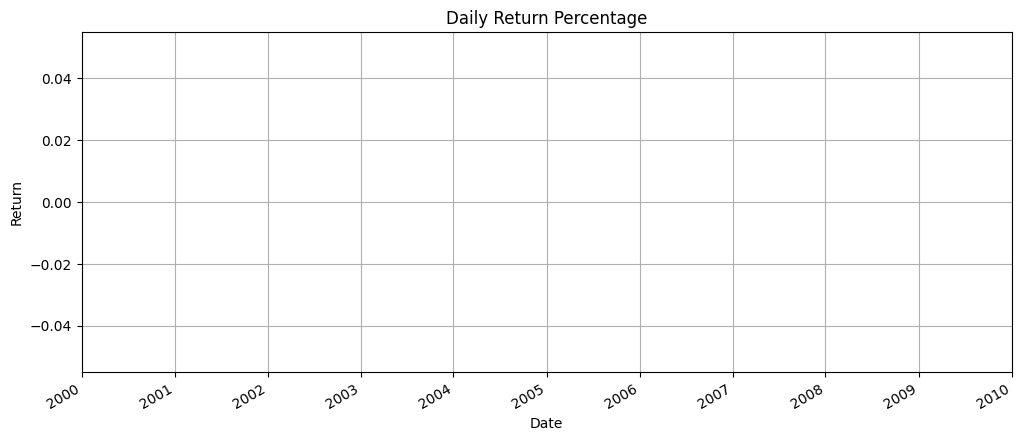

In [ ]:
#Daily Returns (% Change)
data['Daily Return'] = data['Close'].pct_change()

plt.figure(figsize=(12,5))
data['Daily Return'].plot(label='Daily Return', linestyle='-', color='red')
plt.title("Daily Return Percentage")
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid(True)
plt.show()

#Forecasting with Holt-Winters (Exponential Smoothing)

In [ ]:
# Moving Averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Daily Return (%)
data['Daily Return'] = data['Close'].pct_change()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Prepare time series
ts_data = data['Close'].dropna()

# Train/test split
train = ts_data[:-30]
test = ts_data[-30:]

# Fit Holt-Winters model
model = ExponentialSmoothing(train, trend='add', seasonal=None)
hw_fit = model.fit()

# Forecast next 30 days
forecast = hw_fit.forecast(steps=30)
forecast.index = test.index

In [ ]:
# Create a new column and insert the forecast into last 30 rows
data['Forecast_HW'] = None
data.loc[test.index, 'Forecast_HW'] = forecast.values

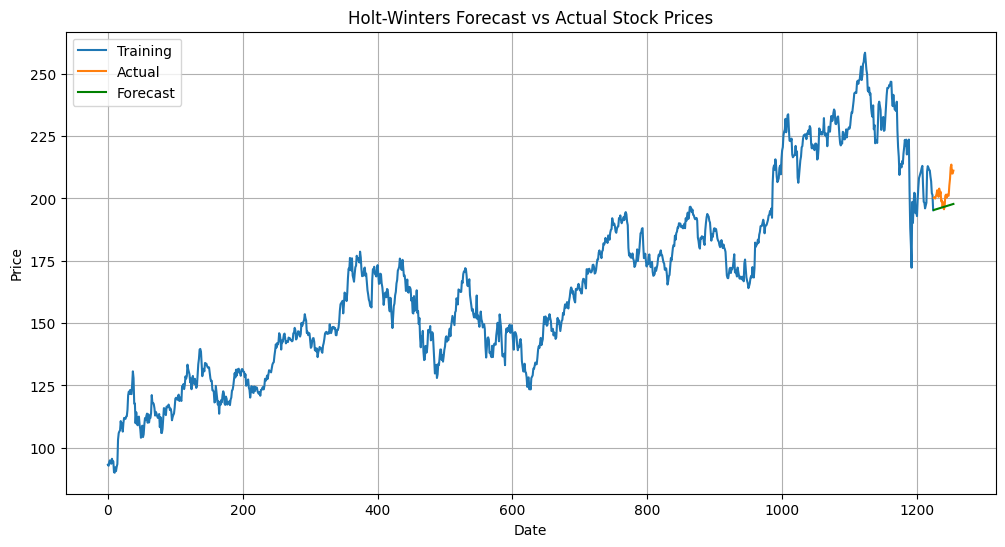

In [ ]:
#Plot Actual vs Forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(forecast, label='Forecast', color='green')
plt.title("Holt-Winters Forecast vs Actual Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

#Evaluate Forecast Performance

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.2f}")

RMSE: 7.41


#Create Export File for Power BI / Tableau

In [ ]:
data.to_csv("stock_analysis_forecast.csv", index=False)

# Download in Google Colab
from google.colab import files
files.download("stock_analysis_forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>